# **Block 1: import libraries**

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

# **Block 2: make function**

In [208]:
def predict(x,y,plot):

  # if there is missing data, fill them in with the median of that column
  for column in data.columns:
    if isinstance(data[column][1],float)==1:
      data[column] = data[column].fillna(data[column].median())

  # X is the column that you input, y is the rate of survival
  X = np.array(x)
  y = np.array(y)

  # if the data in the column are strings (like with the sex column), dummy code the info and have that be X
  if isinstance(x[1],str)==1:
    sex_df = pd.get_dummies(data['sex'],drop_first=True)
    X = np.array(sex_df)
 
  # Use a train and test split with a random_seed = 1; make it a 2d array
  Xtrain,Xtest,ytrain,ytest = train_test_split(X.reshape(len(X),1),y,random_state=1)
  
  # binary tree
  tree_model = tree.DecisionTreeClassifier(max_depth=1)
  tree_model = tree_model.fit(Xtrain, ytrain)

  # check to make sure data isn't overfit; do training - testing
  overfit_check = (tree_model.score(Xtrain, ytrain)) - (tree_model.score(Xtest, ytest))

  # only do these actions if the model isn't overfit
  if overfit_check < .10:
    y_predicted = tree_model.predict_proba(Xtest)[:,1]
    fpr,tpr,thresholds_tree = metrics.roc_curve(ytest,y_predicted)

    # shows the score for area under the curve to show best predictors
    print('testing model score:',tree_model.score(Xtest, ytest))

    TN, FP, FN, TP = metrics.confusion_matrix(ytrain,tree_model.predict(Xtrain)).ravel()
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    print('accuracy score:' ,accuracy)

    # only plot if input argument is True
    if plot == True:
      fig,axes = plt.subplots(2,1,figsize=[10,25])

      sns.boxplot(y,X.reshape(len(X),),ax=axes[0])   # reshape X because it needed 1 dimensional data to graph
      axes[0].set_title('Boxplot (survival on x-axis, predictor on y-axis)')
      plt.xlabel('survival')
      plt.ylabel('predictor')

      axes[1].plot(fpr,tpr, label = 'ROC curve')
      axes[1].set_title('ROC curve')
      axes[1].text(0,.9,'area under the curve score:' + str(metrics.roc_auc_score(ytest,y_predicted)),fontsize=10)
      plt.plot([0,1],[0,1], linestyle=':', label = 'chance')
      plt.xlabel('false positive rate')
      plt.ylabel('true positive rate')
      plt.legend()

      plt.show()

# **Block 3: load the data using sns.load_dataset(‘titanic’)**

In [209]:
data = sns.load_dataset('titanic')

# **Block 4: check for pclass data**

testing model score: 0.6457399103139013
accuracy score: 0.6751497005988024


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


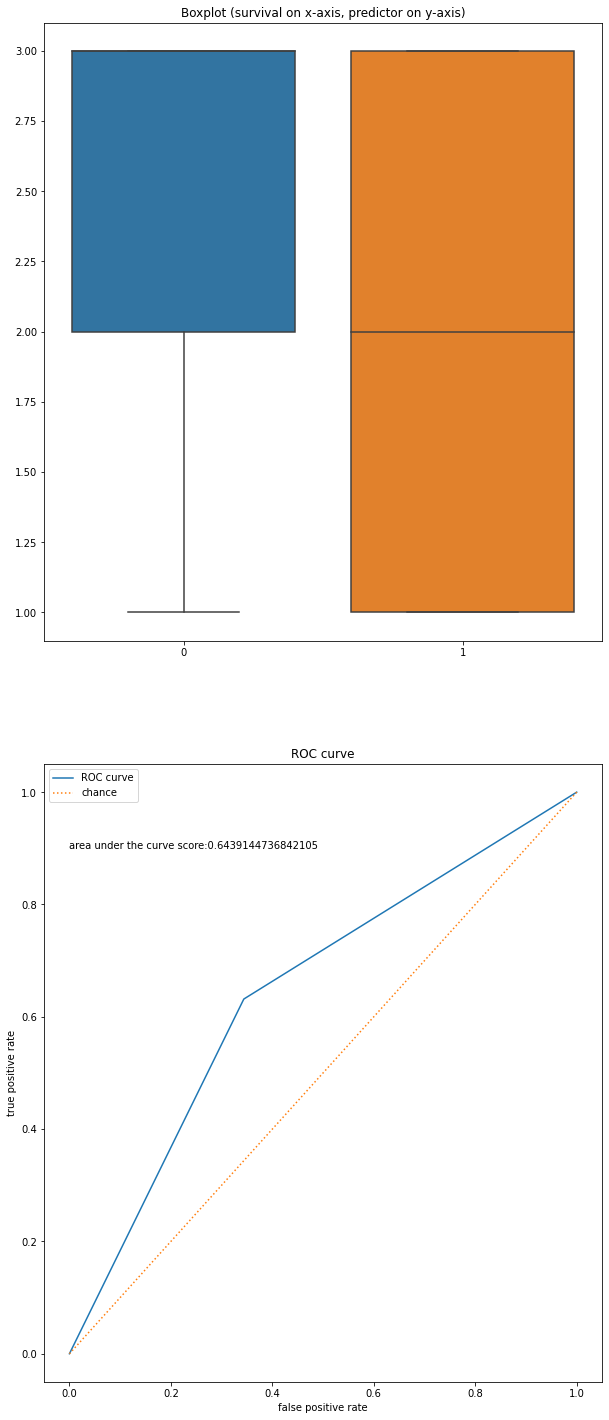

In [210]:
predict(data['pclass'],data['survived'],True)

# **Block 5: check for fare data**

testing model score: 0.5739910313901345
accuracy score: 0.6302395209580839


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


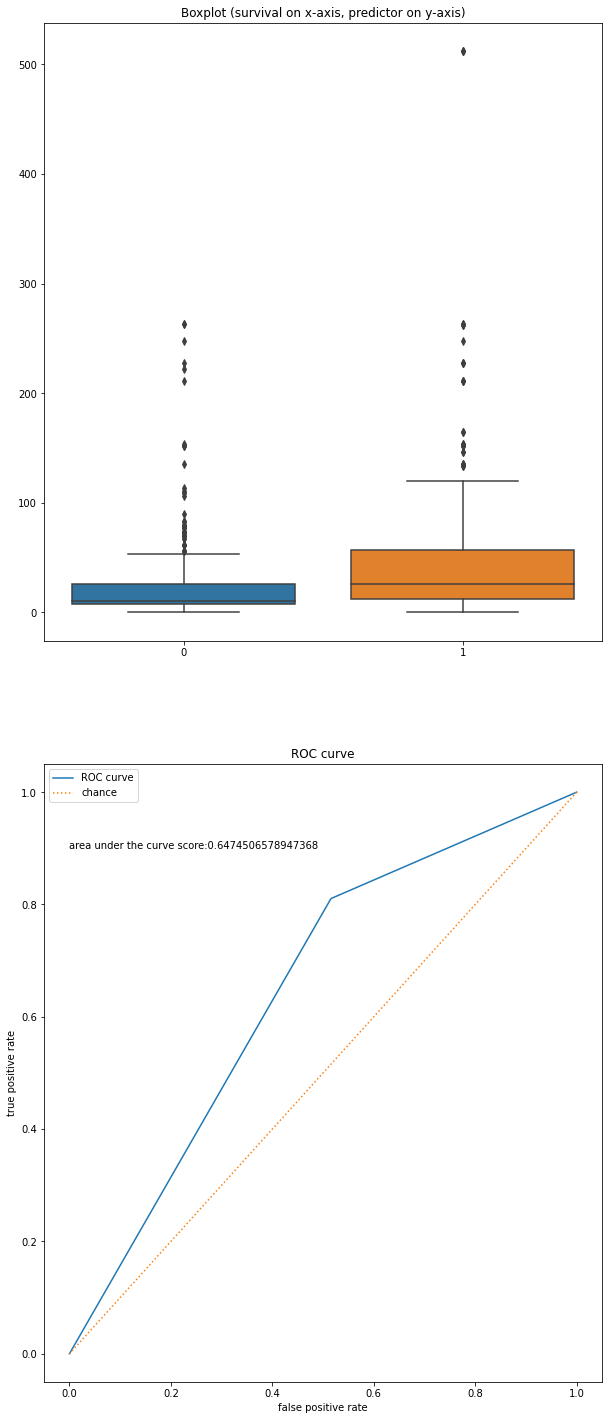

In [211]:
predict(data['fare'],data['survived'],True)

# Pclass is a better predictor of survival than Fare because it has a  higher measure of testing score (using model.score) and accuracy score (using (TP+TN)/(TP+TN+FP+FN)). The testing and accuracy scores for Pclass are 0.6457399103139013 and 0.6751497005988024, while the scores for Fare are 0.5739910313901345 and 0.6302395209580839. If we include the bonus, then sex is the best predictor of survival since it has the highest accuracy and testing scores.



# **Block 6: check for age data**

testing model score: 0.5695067264573991
accuracy score: 0.6601796407185628


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


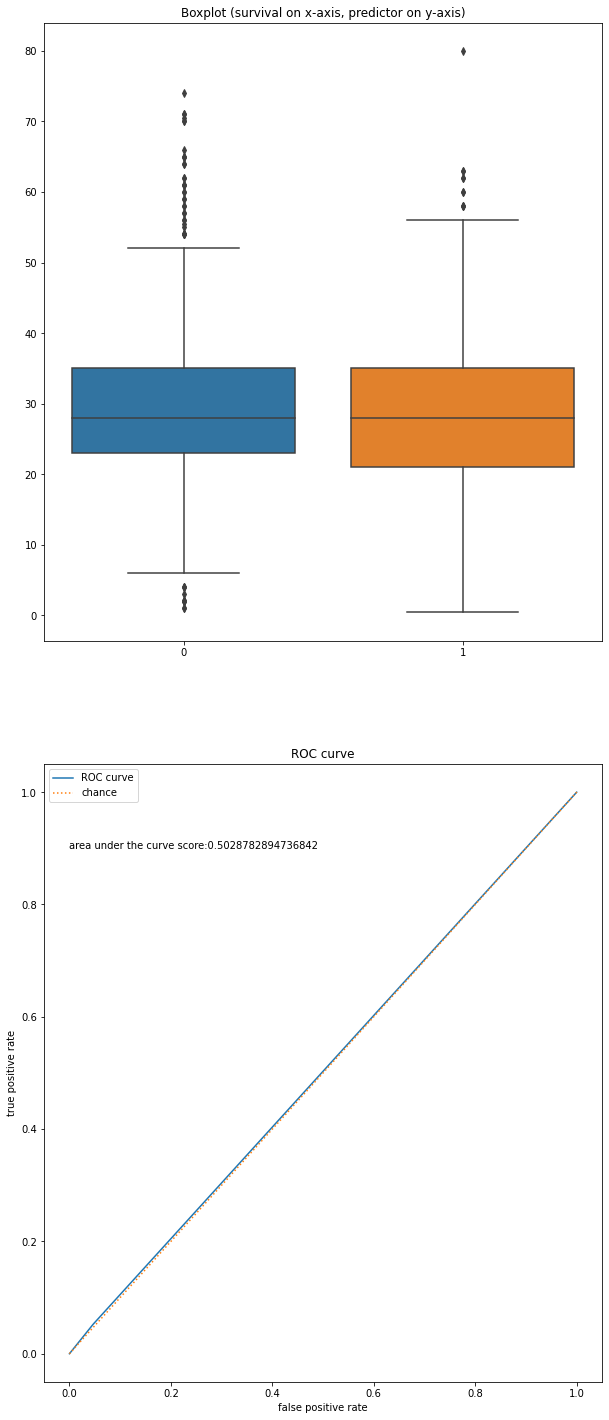

In [212]:
predict(data['age'],data['survived'],True)

# **Block 7: check for sex data**

testing model score: 0.7847533632286996
accuracy score: 0.7874251497005988


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


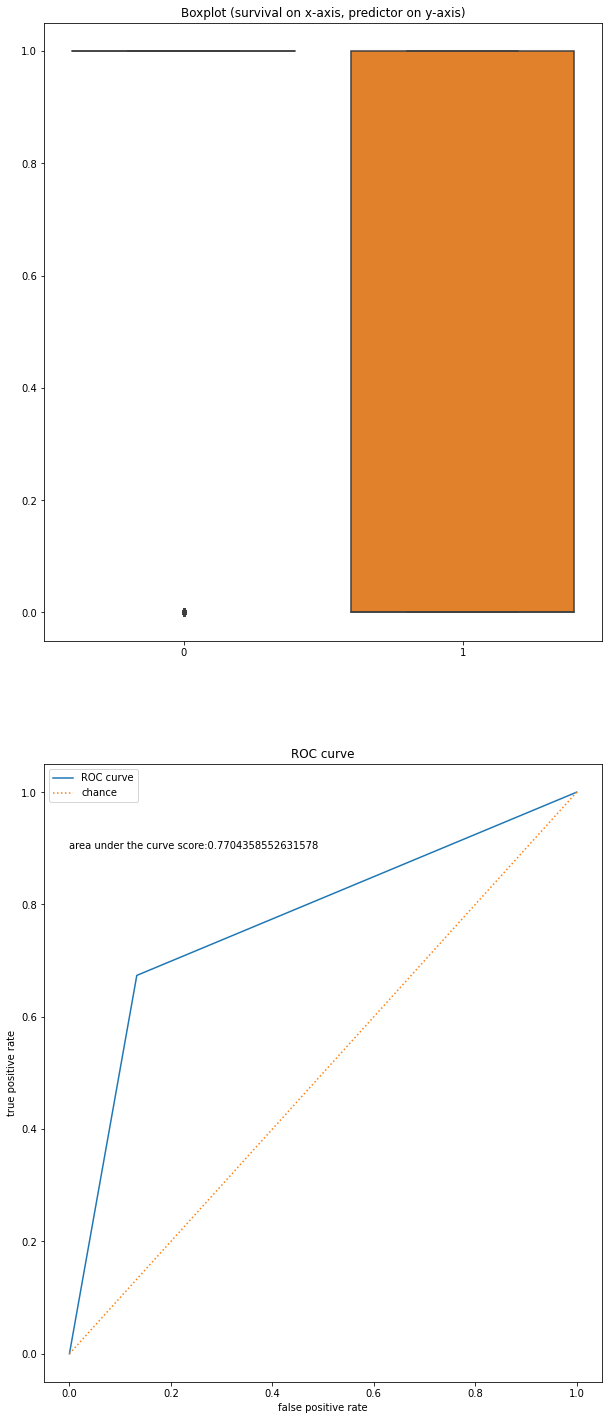

In [213]:
# males are 1 on the y-axis
predict(data['sex'],data['survived'],True)